In [1]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Loading data
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Predict of model 
y_p= knn.predict(X_test)
y_p

from sklearn.metrics import accuracy_score

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_p)
print("Accuracy of the KNN model:", accuracy)



Accuracy of the KNN model: 0.9666666666666667


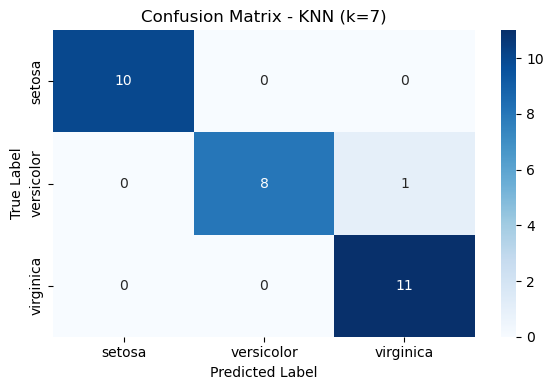

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_p)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=irisData.target_names,
            yticklabels=irisData.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN (k=7)')
plt.tight_layout()
plt.show()


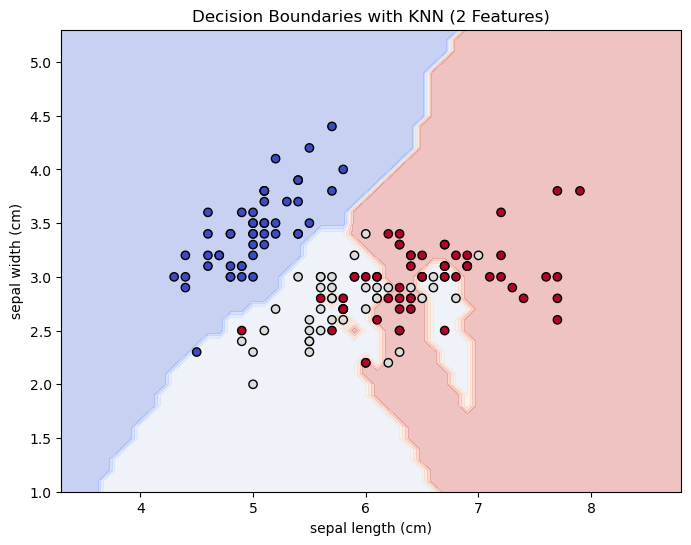

In [4]:
import numpy as np

# Use only first two features
X2 = X[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

# Train a new KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=7)
knn_2d.fit(X_train2, y_train2)

# Meshgrid for boundary
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X2[:, 0], X2[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Decision Boundaries with KNN (2 Features)')
plt.xlabel(irisData.feature_names[0])
plt.ylabel(irisData.feature_names[1])
plt.show()


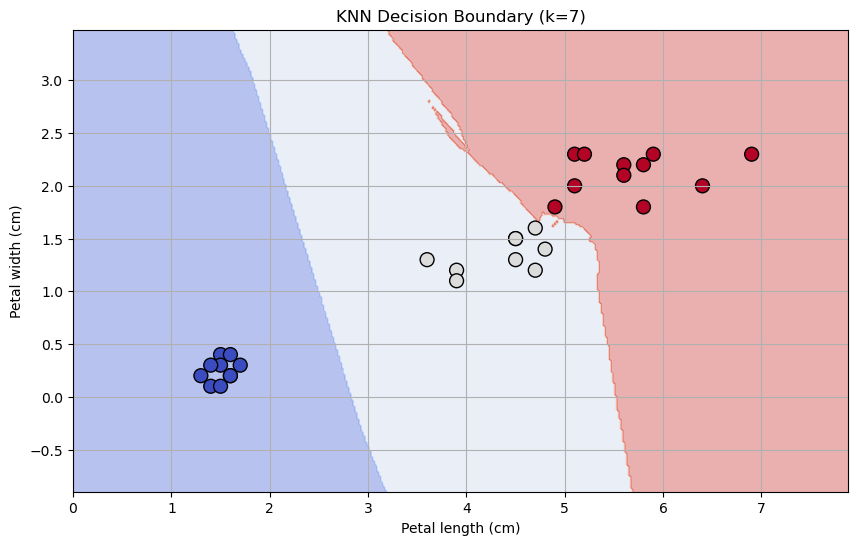

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
X = iris.data[:, [2, 3]]  # Use petal length and width for 2D
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Create meshgrid
h = 0.02  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm', s=100)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('KNN Decision Boundary (k=7)')
plt.grid(True)
plt.show()
